<a href="https://colab.research.google.com/github/ccbohorquezr/UTPC4G12/blob/main/G4_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Presentación

Integrantes:

* Ingrid Elizabeth Valero Salinas
* Claudia Constanza Bohorquez
* Yeicok Hidalgo Rosero

## Objetivo

Los datos se toman de la siguente página:

https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Listado-de-Solicitudes-a-la-Mesa-de-Servicio-de-TI/ihwm-pyi4/about_data

El objetivo del análisis sobre este dataset es el siguiente:

* Analisis descriptivo de los datos para responder preguntas concretas y	predecir el tiempo que tarda en cerrar una solicitud.

### Descripción del dataset

* mes: indica el mes en el que se recibe el caso
* a_o: Año en el cual se genera el caso
* dia: Día en el que se genera el caso
* actividad: Actividad desarrollada
* area_de_servicio: Área interna que recibe el caso
* asunto: Asunto de la solicitud
* atrasada: Indica si la solicitud esta por fuera del tiempo esperado del servicio
* avances_orden_de_trabajo: Porcentaje de avance en la atención de la solicitud
* categor_a: Categoría de la solicitud
* departamento: Departamento
* estado: Indica el estado de la solicitud
* fecha_radicacion_solicitud: fecha y hora en la que se hizo la solicitud
* fecha_cierre_solicitud: fecha y hora en la que se cierra la solicitud
* fecha_vencimiento_solicitud: fecha y hora en la que se vence la solicitud
* medio: indica el medio en el que se hizo la solicitud
* naturaleza:
* numero_servicio: es el identificador de la solicitud
* prioridad: indica la prioridad asignada a la solicitud
* reabierta: Indica si la orden ha sido reabierta
* servicio: indica el tipo de servicio es el encargado del caso
* solucion_orden_trabajo: Indica la solución realizada a la solicitud
* tipo_naturaleza:
* via: indica el medio en el que se hizo la solicitud




## Librerías Generales

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from pycaret.regression import *

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import seaborn as sns


## Conexión a la API

El siguiente código se obtiene directamente de la página de Datos Abiertos de Colombia para el caso particular de "Python Pandas"

https://dev.socrata.com/foundry/www.datos.gov.co/ihwm-pyi4

Instalar la libreria sodapy que nos permite conectar a través de la API de Datos Abiertos de Colombia

In [3]:
!pip install sodapy

Primero se realiza la conexión a la página principal (www.datos.gov.co), luego busca el identificador único de los datos (ihwm-pyi4) y se establece el límite de 12000 ya que el número de filas del dataset es de 11940

In [4]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ihwm-pyi4", limit=12000)

# Convert to pandas DataFrame
datos = pd.DataFrame.from_records(results)

## Recopilación de Datos

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   mes                          11940 non-null  object
 1   a_o                          11940 non-null  object
 2   dia                          11940 non-null  object
 3   actividad                    11895 non-null  object
 4   area_de_servicio             11940 non-null  object
 5   asunto                       11940 non-null  object
 6   atrasada                     11940 non-null  object
 7   avances_orden_de_trabajo     11940 non-null  object
 8   categor_a                    11895 non-null  object
 9   departamento                 11940 non-null  object
 10  estado                       11940 non-null  object
 11  fecha_radicacion_solicitud   11940 non-null  object
 12  fecha_cierre_solicitud       11828 non-null  object
 13  fecha_vencimiento_solicitud  11

In [6]:
datos.describe()

,mes,a_o,dia,actividad,area_de_servicio,asunto,atrasada,avances_orden_de_trabajo,categor_a,departamento,...,fecha_vencimiento_solicitud,medio,naturaleza,numero_servicio,prioridad,reabierta,servicio,solucion_orden_trabajo,tipo_naturaleza,via
count,11940,11940,11940,11895,11940,11940,11940,11940,11895,11940,...,11899,11940,11940,11899,11940,11940,11940,10432,10777,11940
unique,12,3,32,93,6,7258,2,7,69,30,...,10030,7,4,11672,5,2,16,8138,7,7
top,septiembre,2021,8,creacion y Activacion,Servicios Tecnologicos,ALISTAMIENTO DE EQUIPO,No,100,Usuarios,Subdirección de Formalización y Protección del...,...,2020-08-04T15:30:00.000,helppeople,Requerimiento,REQ617,Media,No,Soporte y Mantenimiento,Se atendió el requerimiento y se realizó la in...,Servicio,helppeople
freq,1973,7179,636,2723,11097,151,8955,11554,3079,3776,...,34,6613,10840,11,11477,11930,5045,281,8860,6613


## Preprocesamiento de Datos

### Cambio de nombre a columnas

In [7]:
datos = datos.rename(columns={"a_o": "año", "categor_a": "categoria"})

In [8]:
datos.columns

Index(['mes', 'año', 'dia', 'actividad', 'area_de_servicio', 'asunto',
       'atrasada', 'avances_orden_de_trabajo', 'categoria', 'departamento',
       'estado', 'fecha_radicacion_solicitud', 'fecha_cierre_solicitud',
       'fecha_vencimiento_solicitud', 'medio', 'naturaleza', 'numero_servicio',
       'prioridad', 'reabierta', 'servicio', 'solucion_orden_trabajo',
       'tipo_naturaleza', 'via'],
      dtype='object')

### Transformación de los datos

Se observa que al realizar el .info() todas las columnas son de tipo "object", luego se va a proceder a cambiar dicha naturaleza por una apropiada para el análisis de los datos

#### Valores categóricos

In [9]:
datos['mes'] = datos['mes'].astype("category")
datos["area_de_servicio"] = datos['area_de_servicio'].astype("category")
datos["atrasada"] = datos['atrasada'].astype("category")
datos["categoria"] = datos['categoria'].astype("category")
datos["departamento"] = datos['departamento'].astype("category")
datos["estado"] = datos['estado'].astype("category")
datos["medio"] = datos['medio'].astype("category")
datos["naturaleza"] = datos['naturaleza'].astype("category")
datos["prioridad"] = datos['prioridad'].astype("category")
datos["reabierta"] = datos['reabierta'].astype("category")
datos["servicio"] = datos['servicio'].astype("category")
datos["tipo_naturaleza"] = datos['tipo_naturaleza'].astype("category")
datos["via"] = datos['via'].astype("category")

#### Valores datetime

In [10]:
datos['fecha_radicacion_solicitud'] = pd.to_datetime(datos['fecha_radicacion_solicitud'])
datos['fecha_cierre_solicitud'] = pd.to_datetime(datos['fecha_cierre_solicitud'])
datos['fecha_vencimiento_solicitud'] = pd.to_datetime(datos['fecha_vencimiento_solicitud'])


#### Valores numéricos

In [11]:
datos['año'] = datos['año'].astype(int)
datos['dia'] = datos['dia'].astype(int)
datos["avances_orden_de_trabajo"] = datos['avances_orden_de_trabajo'].astype(float)

Verificar los cambios realizados

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mes                          11940 non-null  category      
 1   año                          11940 non-null  int64         
 2   dia                          11940 non-null  int64         
 3   actividad                    11895 non-null  object        
 4   area_de_servicio             11940 non-null  category      
 5   asunto                       11940 non-null  object        
 6   atrasada                     11940 non-null  category      
 7   avances_orden_de_trabajo     11940 non-null  float64       
 8   categoria                    11895 non-null  category      
 9   departamento                 11940 non-null  category      
 10  estado                       11940 non-null  category      
 11  fecha_radicacion_solicitud   11940 non-nu

### Valores atípicos

In [13]:
print("----------- Valores únicos por columna -----------")
for i in datos.columns:
    print(i,":", len(datos[i].unique()))

----------- Valores únicos por columna -----------
mes : 12
año : 3
dia : 32
actividad : 94
area_de_servicio : 6
asunto : 7258
atrasada : 2
avances_orden_de_trabajo : 7
categoria : 70
departamento : 30
estado : 3
fecha_radicacion_solicitud : 11658
fecha_cierre_solicitud : 11510
fecha_vencimiento_solicitud : 10031
medio : 7
naturaleza : 4
numero_servicio : 11673
prioridad : 5
reabierta : 2
servicio : 16
solucion_orden_trabajo : 8139
tipo_naturaleza : 8
via : 7


Se observa que en la columna "dia" existe 32 valores únicos lo cual nos indica que puede tener un valor outlier o atípico.

In [14]:
sorted(datos["dia"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

Se observa que existe día 0. Entonces verifiquemos el número de filas que cumplen dicha condición.

In [15]:
dia_0 = datos.loc[datos["dia"] == 0]
dia_0

,mes,año,dia,actividad,area_de_servicio,asunto,atrasada,avances_orden_de_trabajo,categoria,departamento,...,fecha_vencimiento_solicitud,medio,naturaleza,numero_servicio,prioridad,reabierta,servicio,solucion_orden_trabajo,tipo_naturaleza,via
71,enero,1900,0,NaN,Sistemas de Informacion,Asignación de Rol calidad usuario mmarin en SAP,No,0.0,NaN,Secretaria de Convivencia y Seguridad Ciudadana,...,NaT,helppeople,Requerimiento,NaN,Media,No,Aplicaciones,NaN,NaN,helppeople
89,enero,1900,0,NaN,Servicios Tecnologicos,SOLICITUD SOPORTE,No,0.0,NaN,Departamento Administrativo de Planeacion,...,NaT,helppeople,Requerimiento,NaN,Media,No,Soporte y Mantenimiento,NaN,NaN,helppeople
174,enero,1900,0,NaN,Servicios Tecnologicos,Acceso a página SECOP II,No,0.0,NaN,Secretaria de Convivencia y Seguridad Ciudadana,...,NaT,helppeople,Requerimiento,NaN,Media,No,Solucion de Seguridad,NaN,NaN,helppeople
296,enero,1900,0,NaN,Centro de Competencias,solicitud arreglo tubo de desagüe de la cocineta,No,0.0,NaN,Secretaria de Desarrollo Económico y Competiti...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Centro de Competencias,NaN,NaN,helppeople
687,enero,1900,0,NaN,Servicios Tecnologicos,solicitud de revisión de conexión a internet,No,0.0,NaN,Secretaria de Desarrollo Económico y Competiti...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Conectividad,NaN,NaN,helppeople
780,enero,1900,0,NaN,Economia Digital,Prueba de datos abiertos,No,0.0,NaN,Secretaria de las Tecnologias de la Informacio...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Gobierno Digital,NaN,NaN,helppeople
958,enero,1900,0,NaN,Servicios Tecnologicos,SADE,No,0.0,NaN,Departamento Administrativo de Hacienda y Fina...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Servidores,NaN,NaN,helppeople
995,enero,1900,0,NaN,Sistemas de Informacion,CORREO INSTITUCIONAL,No,0.0,NaN,Secretaria de Salud,...,NaT,helppeople,Requerimiento,NaN,Media,No,Aplicaciones,NaN,NaN,helppeople
1469,enero,1900,0,NaN,Sistemas de Informacion,Actualización de datos del señor Walter Méndez...,No,0.0,NaN,Secretaria de las Tecnologias de la Informacio...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Aplicaciones,NaN,NaN,helppeople
1730,enero,1900,0,NaN,Sistemas de Informacion,Solicitud cambio de correo electrónico sistema...,No,0.0,NaN,Secretaria de las Tecnologias de la Informacio...,...,NaT,helppeople,Requerimiento,NaN,Media,No,Aplicaciones,NaN,NaN,helppeople


Son 33 filas que tiene dicha información además se observa que los valores de la columna "año" son solo de 1900 y pueden ser también valores outliers.

In [16]:
dia_0["año"].unique() # único año presente en ese dataframe

array([1900])

Ahora se verifica si al filtrar los datos por el año 1900, ¿qué días se obtienen?

In [17]:
datos.loc[datos["año"] == 1900]["dia"].unique()

array([0])

In [18]:
print("----------- Porcentaje de los valores día 0 -----------")
((dia_0.shape[0])/datos.shape[0])*100

----------- Porcentaje de los valores día 0 -----------


0.2763819095477387

Luego tanto los valores del día 0 como los del año 1900 están relacionados y representan un 0.27% de los datos originales entonces se procede a filtrar los datos de tal forma que no existan dichas filas.

In [19]:

print("Tamaño del dataset original: ", datos.shape)
datos = datos[datos["año"] != 1900]
print("Tamaño del dataset después del filtro: ", datos.shape)

Tamaño del dataset original:  (11940, 23)
Tamaño del dataset después del filtro:  (11907, 23)


### Datos Faltantes o Duplicados

In [20]:
print("----------- Valores faltantes por columna -----------")
for i in datos.columns:
    print(i,":", datos[i].isna().sum())

----------- Valores faltantes por columna -----------
mes : 0
año : 0
dia : 0
actividad : 12
area_de_servicio : 0
asunto : 0
atrasada : 0
avances_orden_de_trabajo : 0
categoria : 12
departamento : 0
estado : 0
fecha_radicacion_solicitud : 0
fecha_cierre_solicitud : 110
fecha_vencimiento_solicitud : 8
medio : 0
naturaleza : 0
numero_servicio : 8
prioridad : 0
reabierta : 0
servicio : 0
solucion_orden_trabajo : 1475
tipo_naturaleza : 1130
via : 0


In [21]:
print("----------- Valores duplicados en los datos -----------")
datos.duplicated().sum()

----------- Valores duplicados en los datos -----------


181

In [22]:
print("----------- Porcentaje de los valores duplicados -----------")
((datos.duplicated().sum())/datos.shape[0])*100

----------- Porcentaje de los valores duplicados -----------


1.520114218526917

Se observa que los datos duplicados representan un 1.52% de los datos originales, luego se prodece a eliminarlos

In [23]:
print("Tamaño del dataset original: ", datos.shape)
datos = datos.drop_duplicates()
print("Tamaño del dataset sin duplicados: ", datos.shape)

Tamaño del dataset original:  (11907, 23)
Tamaño del dataset sin duplicados:  (11726, 23)


### Imputación de valores faltantes

Se realiza la imputación de las columnas:
* "categoria"
* "tipo_naturaleza"
* "fecha_vencimiento_solicitud"
* "fecha_cierre_solicitud"

#### Columna "categoria"

Se agrupa los datos según la columna "servicio" y se obtiene el valore más frecuente y este se usa para completar los valores faltantes en la columna "categoria"

In [24]:
datos['categoria'] = datos.groupby('servicio')['categoria'].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [25]:
print("----------- Valores faltantes en 'categoria' -----------")
datos["categoria"].isna().sum()

----------- Valores faltantes en 'categoria' -----------


0

#### Columna "tipo_naturaleza"

Se agrupa los datos según la columna "servicio" y se obtiene el valore más frecuente y este se usa para completar los valores faltantes en la columna "tipo_naturaleza"

In [26]:
# Verifica si hay valores únicos en la columna 'tipo_naturaleza' para cada grupo de 'servicio'
modos_por_servicio = datos.groupby('servicio')['tipo_naturaleza'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Llena los valores faltantes en 'tipo_naturaleza' usando el modo por cada grupo de 'servicio'
datos['tipo_naturaleza'] = datos.apply(lambda row: modos_por_servicio[row['servicio']] if pd.isnull(row['tipo_naturaleza']) else row['tipo_naturaleza'], axis=1)


In [27]:
print("----------- Valores faltantes en 'tipo_naturaleza' -----------")
datos["tipo_naturaleza"].isna().sum()

----------- Valores faltantes en 'tipo_naturaleza' -----------


25

Como persisten valores faltantes en este columna entoces verifiquemos la frecuencia de los valores de dicha columna

In [28]:
datos["tipo_naturaleza"].value_counts()

tipo_naturaleza
Servicio          9825
Actualizacion     1292
Soporte            508
Mantenimiento       63
Suministro           7
Repuesto             3
Error Conocido       3
Name: count, dtype: int64

Como el valor más frecuente en "tipo_naturaleza" es Servicio luego se va usar este valor para completar los valores faltantes

In [29]:
datos["tipo_naturaleza"] = datos["tipo_naturaleza"].fillna('Servicio')

In [30]:
print("----------- Valores faltantes en 'tipo_naturaleza' -----------")
datos["tipo_naturaleza"].isna().sum()

----------- Valores faltantes en 'tipo_naturaleza' -----------


0

#### Columna "fecha_vencimiento_solicitud"

Primero se calcula el tiempo transcurrido desde que se hizo la solicitud y su fecha de vencimiento. Luego, se hace el promedio de dicha diferencia

In [31]:
diferencia_tiempo = datos['fecha_vencimiento_solicitud'] - datos['fecha_radicacion_solicitud']
diferencia_tiempo.mean()

Timedelta('2 days 00:26:17.770438641')

Luego se suma ese promedio con los valores de "fecha_radicacion_solicitud" para completar los valores faltantes en la columna "fecha_vencimiento_solicitud"

In [32]:
datos['fecha_vencimiento_solicitud'] = datos['fecha_vencimiento_solicitud'].fillna(datos['fecha_radicacion_solicitud']+diferencia_tiempo.mean())

In [33]:
print("----------- Valores faltantes en 'fecha_vencimiento_solicitud' -----------")
datos["fecha_vencimiento_solicitud"].isna().sum()

----------- Valores faltantes en 'fecha_vencimiento_solicitud' -----------


0

#### Columna "fecha_cierre_solicitud"

Se va completar los valores faltantes de está columna usando los valores de la columna "fecha_vencimiento_solicitud"

In [34]:
datos['fecha_cierre_solicitud'] = datos['fecha_cierre_solicitud'].fillna(datos['fecha_vencimiento_solicitud'])

In [35]:
print("----------- Valores faltantes en 'fecha_cierre_solicitud' -----------")
datos["fecha_cierre_solicitud"].isna().sum()

----------- Valores faltantes en 'fecha_cierre_solicitud' -----------


0

### Crear columnas numéricas

Ahora se van a crear columnas numéricas que van a representar los valores de las columnas categóricas, para esto se hace uso de la función ***.factorize()*** de Pandas para asignar un número entero a cada valor único en una serie, lo que permite convertir variables categóricas en variables numéricas de una manera conveniente y eficiente, estos números comienzan desde 0.

Para crear una columna de tal forma que para el mes de enero le corresponda el número o id 1 se realiza lo siguiente

In [36]:
# Diccionario para mapear nombres de meses a números enteros
data_mes = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}

# Crear una nueva columna 'id_mes' utilizando map con el diccionario data_mes
datos['id_mes'] = datos['mes'].map(data_mes)
datos['id_mes'] = datos['id_mes'].astype(int)

Ahora de manera general asignar un único id para las demás columnas categóricas

In [37]:
cols_to_use = ["area_de_servicio", "atrasada", "categoria", "departamento", "estado", "medio",
               "naturaleza", "prioridad", "reabierta", "servicio", "tipo_naturaleza", "via"]

for col in cols_to_use:
    datos[f'id_{col}'] = pd.factorize(datos[col])[0] # se empieza desde 0 en cada columna

# Acceder a los valores únicos y su correspondiente número
for col in cols_to_use:
    unique_values = datos[col].unique()
    id_col = f'id_{col}'
    unique_ids = datos[id_col].unique()

    print(f'Valores únicos para la columna "{col}":', '\n')
    for value, unique_id in zip(unique_values, unique_ids):
        print(f'{value}: {unique_id}')

    print('\n')

Valores únicos para la columna "area_de_servicio": 

Servicios Tecnologicos: 0
Sistemas de Informacion: 1
ValleCorona: 2
Economia Digital: 3
Contratación directa: 4
Centro de Competencias: 5


Valores únicos para la columna "atrasada": 

No: 0
Si: 1


Valores únicos para la columna "categoria": 

Virtualizacion: 0
Impresora: 1
Cloud: 2
Equipos: 3
Almacenamiento: 4
Sistema Operativo: 5
Internet: 6
Canales de Internet: 7
Gestion de aplicaciones: 8
Equipo de desktop: 9
Usuarios: 10
Backup: 11
Periféricos: 12
SADE: 13
Escaner: 14
Asesoria: 15
Videoconferencia: 16
Gmail: 17
Regulador: 18
Conexion VPN: 19
Hardware: 20
Sistemas operativos: 21
Gestión de datos: 22
Punto electrico: 23
Software: 24
Puntos de Red: 25
Aplicación Cali valle corona: 26
Control de Aplicaciones: 27
Gestion de Usuarios: 28
SIAF XXI: 29
Antivirus: 30
Validación de servicios: 31
Otras aplicaciones o Sitios web: 32
Normalización de servicios: 33
Tabulados: 34
Datos abiertos: 35
Audiovisuales: 36
Aplicación telemedicina: 3

In [38]:
datos.columns

Index(['mes', 'año', 'dia', 'actividad', 'area_de_servicio', 'asunto',
       'atrasada', 'avances_orden_de_trabajo', 'categoria', 'departamento',
       'estado', 'fecha_radicacion_solicitud', 'fecha_cierre_solicitud',
       'fecha_vencimiento_solicitud', 'medio', 'naturaleza', 'numero_servicio',
       'prioridad', 'reabierta', 'servicio', 'solucion_orden_trabajo',
       'tipo_naturaleza', 'via', 'id_mes', 'id_area_de_servicio',
       'id_atrasada', 'id_categoria', 'id_departamento', 'id_estado',
       'id_medio', 'id_naturaleza', 'id_prioridad', 'id_reabierta',
       'id_servicio', 'id_tipo_naturaleza', 'id_via'],
      dtype='object')

In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11726 entries, 0 to 11939
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mes                          11726 non-null  category      
 1   año                          11726 non-null  int64         
 2   dia                          11726 non-null  int64         
 3   actividad                    11714 non-null  object        
 4   area_de_servicio             11726 non-null  category      
 5   asunto                       11726 non-null  object        
 6   atrasada                     11726 non-null  category      
 7   avances_orden_de_trabajo     11726 non-null  float64       
 8   categoria                    11726 non-null  category      
 9   departamento                 11726 non-null  category      
 10  estado                       11726 non-null  category      
 11  fecha_radicacion_solicitud   11726 non-null  d

### Matriz de Correlación

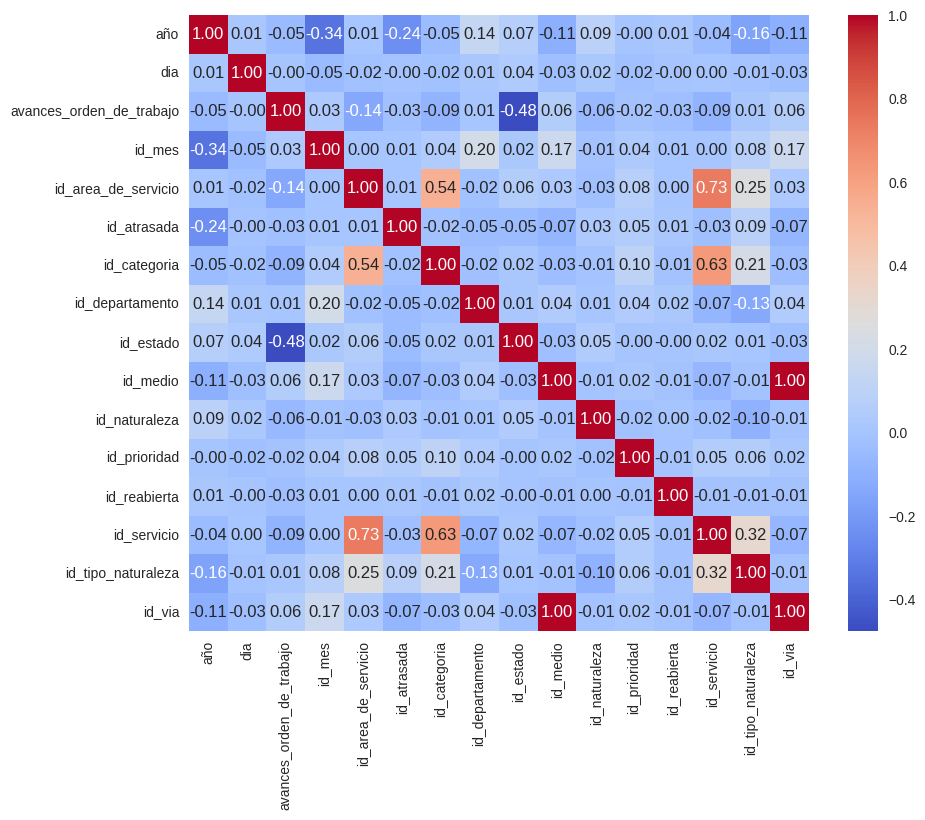

In [40]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = datos.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(datos[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Se observa que para las columnas "id_medio" y "id_via" hay una correlación positiva de 1, luego esto nos dice que una variable puede ser predicha exactamente a partir de la otra usando una ecuación lineal y para efectos sobre futuros modelamientos o regresiones no añade una nueva información por tanto se puede descartar una de las variables sin perder capacidad predictiva.

## Análisis descriptivo

Mayor concentracion de servicios, porcentaje de avance en las solicitudes, promedio de las solicitudes reabiertas, cantidad de solicitudes por requerimento e indicente, fechas donde se muestren mayor cantidad de solicitudes puede ser por meses o días por meses,  cual de esos departamentos(internos) de la gobernación presentan mayoria de solicitudes.


### Concentración de los servicios

El objetivo es conocer la concentración de servicios dentro de la mesa de solicitudes IT de la Gobernación del Valle del Cauca.

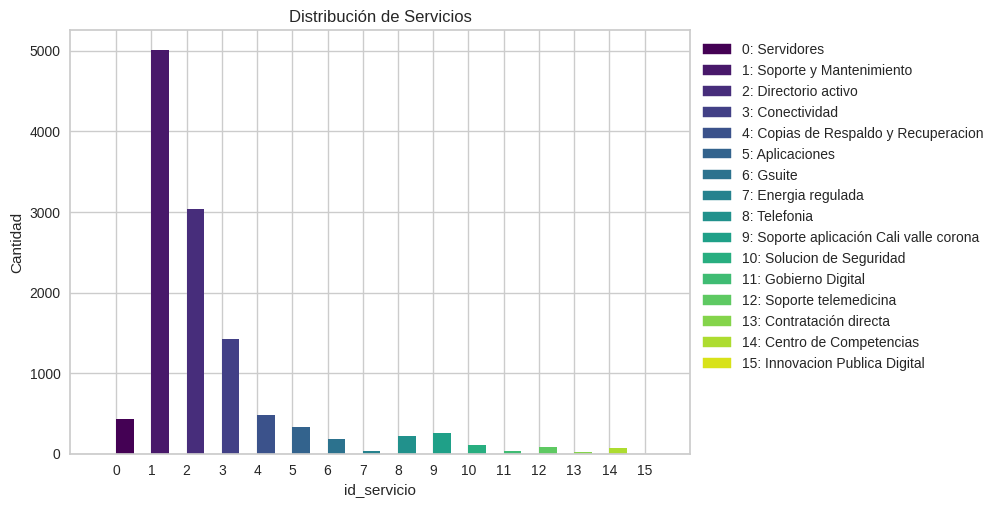

In [41]:
id_servicio_nombre = dict(zip(datos['id_servicio'].unique(), datos['servicio'].unique()))
# Create a list to store legend patches
legend_patches = []
# Choose a colormap
colormap = plt.colormaps['viridis']
# Number of unique IDs
num_ids = len(id_servicio_nombre)
for i, id_val in enumerate(id_servicio_nombre.keys()):
  color = colormap(i / num_ids)
  plt.hist(datos[datos['id_servicio'] == id_val]['id_servicio'], bins=20, label=str(id_val),
           alpha=1, color=color, width=0.5)
  legend_patches.append(mpatches.Patch(color=color, label=f"{id_val}: {id_servicio_nombre[id_val]}"))

# Add labels and title
plt.xlabel('id_servicio')
plt.ylabel('Cantidad')
plt.title('Distribución de Servicios')
plt.xticks(datos['id_servicio'].unique())
# Add the legend
plt.legend(handles=legend_patches, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Según el histograma de la distribución de los servicios el top 3 de ellos corresponden a "Soporte y Mantenimiento", "Directorio activo" y "Conectividad" respectivamente.

### Porcentaje de los avances en las ordenes de trabajo

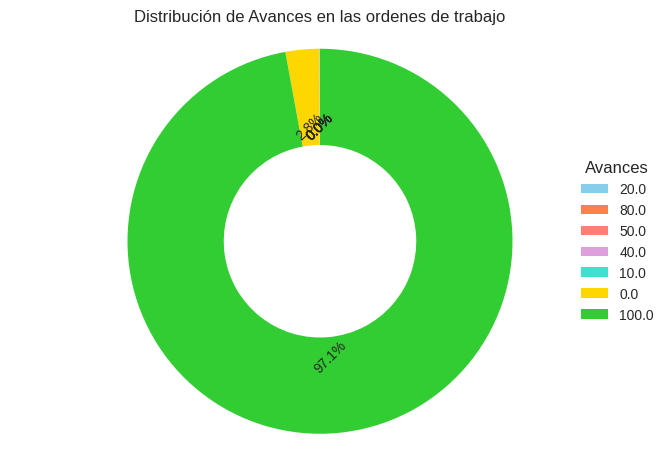

In [42]:
# Calculate frequencies and percentages
frequencies = datos['avances_orden_de_trabajo'].value_counts()
percentages = (frequencies / frequencies.sum()) * 100
percentages = percentages.sort_values(ascending=True)

color_pie = ['skyblue', 'coral',  'salmon', 'plum', 'turquoise', 'gold', 'limegreen',]
# Create the pie chart
plt.pie(percentages, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10, 'rotation': 45},
        wedgeprops=dict(width=0.5), colors=color_pie)
plt.legend(percentages.index, title="Avances", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Add labels and title
plt.title('Distribución de Avances en las ordenes de trabajo')
plt.axis('equal')
plt.show()

Se concluye que el 97.1% de las ordenes de trabajo fueron completadas exitosamente (100.0) y que el 2.8% de las ordenes no lo fueron (0.0)

### Porcentaje de solicitudes reabiertas

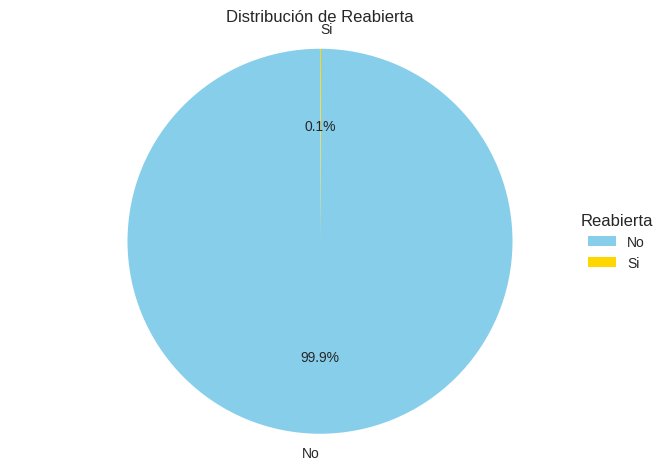

In [43]:
# Calculate value counts and percentages
frequencies_reabierta = datos['reabierta'].value_counts()
percentages_reabierta = (frequencies_reabierta / frequencies_reabierta.sum()) * 100
color_pie_2 = ['skyblue', 'gold', ]

# Create the pie chart
plt.pie(percentages_reabierta, labels=percentages_reabierta.index, autopct='%1.1f%%',
        startangle=90, colors=color_pie_2, textprops={'fontsize': 10})
plt.legend(percentages_reabierta.index, title="Reabierta", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.title('Distribución de Reabierta')
plt.axis('equal')
plt.show()

Se observa que con un 99.9% no hay solicitudes reabiertas en la mesa de servicio.

### Distribución de solicitudes por mes

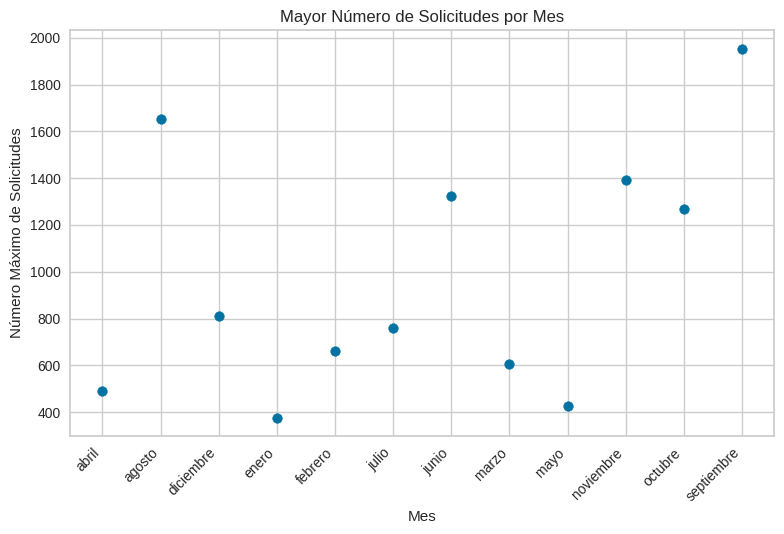

In [44]:
# Group by month, count requests
monthly_counts = datos.groupby('mes')['fecha_radicacion_solicitud'].count().reset_index(name='count')

# Create scatter plot
plt.scatter(monthly_counts['mes'], monthly_counts['count'])

# Set labels and title
plt.xlabel('Mes')
plt.ylabel('Número Máximo de Solicitudes')
plt.title('Mayor Número de Solicitudes por Mes')

plt.xticks((monthly_counts['mes']), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Se observa que casi todos los meses con mayor solicitudes son aquellos del segundo semestre del año, es decir, Agosto, Septiembre, Octubre y Noviembre. Y también el mes de Junio.

* Septiembre es el mes con más número de solicitudes con cerca de 2000
* Enero es el mes con menos número de solicitudes con aproximadamente 400

## Distribución de solicitudes por vía

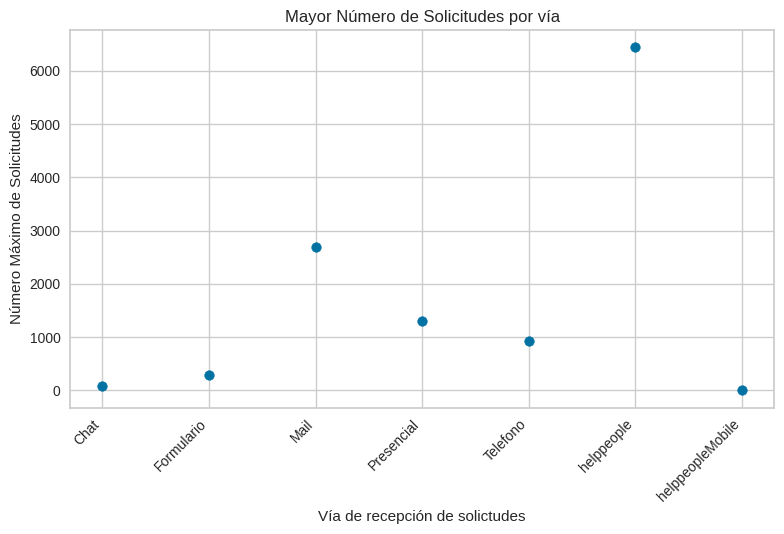

In [59]:
# Group by Vía, count requests
via_counts = datos.groupby('via')['fecha_radicacion_solicitud'].count().reset_index(name='count')

# Create scatter plot
plt.scatter(via_counts['via'], via_counts['count'])

# Set labels and title
plt.xlabel('Vía de recepción de solictudes')
plt.ylabel('Número Máximo de Solicitudes')
plt.title('Mayor Número de Solicitudes por vía')

plt.xticks((via_counts['via']), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Se observa que la vía por la que más se registra el mayor número de solicitudes es el ingreso por la mesa de servicios por lo que se cumple el con el propósito de la mesa y es que sea el principal canal de recepción de solicitudes.

* HelpPeople recibio cerca de 7000 solicitudes.
* Mail el siguiente canal de recepción de solictudes cerca de 2900 solicitudes * Y los medios que menos reciben solicitudes son el Chat y los canales de disposituvos moviles.

## Predicción



Se desea predecir el tiempo en que se demora en cerrar una solicitud, por ello se va a hacer uso de la librería PyCaret para conocer el mejor modelo.

In [46]:
# Variables Independientes
cols = ['id_mes','año', 'dia', 'id_area_de_servicio', 'id_atrasada', 'id_categoria',
              'id_departamento', 'id_estado', 'id_medio', 'id_naturaleza', 'id_prioridad',
              'id_reabierta', 'id_servicio', 'id_tipo_naturaleza', 'avances_orden_de_trabajo',
              'fecha_radicacion_solicitud', 'fecha_cierre_solicitud', 'fecha_vencimiento_solicitud']
datos1 = datos[cols]
datos1.head()

,id_mes,año,dia,id_area_de_servicio,id_atrasada,id_categoria,id_departamento,id_estado,id_medio,id_naturaleza,id_prioridad,id_reabierta,id_servicio,id_tipo_naturaleza,avances_orden_de_trabajo,fecha_radicacion_solicitud,fecha_cierre_solicitud,fecha_vencimiento_solicitud
0,4,2021,5,0,0,0,0,0,0,0,0,0,0,0,100.0,2021-04-05 09:18:49,2021-04-05 09:19:20,2021-04-06 17:18:00
1,4,2021,5,0,1,1,1,0,1,0,0,0,1,0,100.0,2021-04-05 09:19:59,2021-04-07 14:00:24,2021-04-06 17:20:00
2,4,2021,5,0,0,2,0,0,0,0,0,0,0,0,100.0,2021-04-05 09:20:10,2021-04-05 09:20:42,2021-04-06 17:20:00
3,4,2021,5,0,0,3,0,0,0,0,0,0,2,0,100.0,2021-04-05 09:21:22,2021-04-05 09:21:54,2021-04-06 17:21:00
4,4,2021,5,0,0,4,0,0,0,0,0,0,0,0,100.0,2021-04-05 09:22:40,2021-04-05 09:23:05,2021-04-06 17:22:00


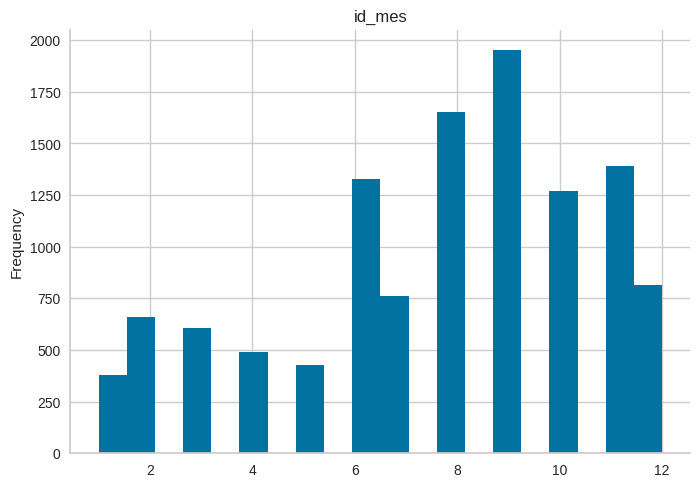

In [61]:
# @title id_mes

from matplotlib import pyplot as plt
datos1['id_mes'].plot(kind='hist', bins=20, title='id_mes')
plt.gca().spines[['top', 'right',]].set_visible(False)

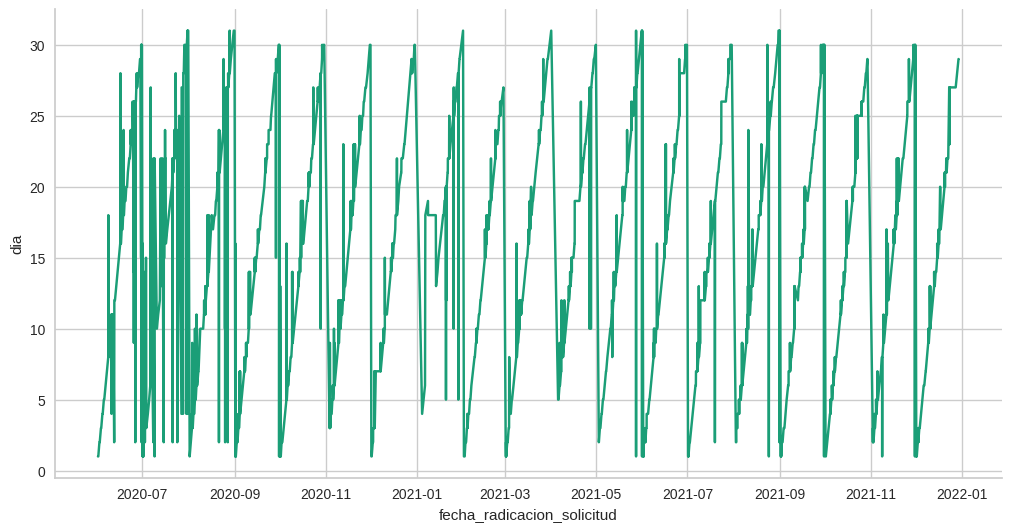

In [60]:
# @title fecha_radicacion_solicitud vs dia

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha_radicacion_solicitud']
  ys = series['dia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datos1.sort_values('fecha_radicacion_solicitud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha_radicacion_solicitud')
_ = plt.ylabel('dia')

In [47]:
# Calcular la diferencia en horas entre las fechas
datos1['tiempo_resolucion'] = (datos1['fecha_cierre_solicitud'] - datos1['fecha_radicacion_solicitud']).dt.total_seconds() / 3600.0


In [48]:
datos1.describe()

,id_mes,año,dia,id_area_de_servicio,id_atrasada,id_categoria,id_departamento,id_estado,id_medio,id_naturaleza,id_prioridad,id_reabierta,id_servicio,id_tipo_naturaleza,avances_orden_de_trabajo,fecha_radicacion_solicitud,fecha_cierre_solicitud,fecha_vencimiento_solicitud,tiempo_resolucion
count,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726.000000,11726,11726,11726,11726.000000
mean,7.627921,2020.601313,15.143271,0.133123,0.249872,12.086645,5.445676,0.007419,0.938172,0.094064,0.099267,0.000853,2.394082,0.218489,97.139690,2021-03-11 16:45:52.411393792,2021-03-14 19:49:38.782712064,2021-03-13 17:12:10.181831936,75.062881
min,1.000000,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-06-01 11:24:31,2020-06-01 17:09:41,2020-06-01 15:24:00,-11.651667
25%,6.000000,2020.000000,8.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,2020-09-29 08:57:27.500000,2020-10-02 09:21:51,2020-09-30 13:51:45,0.796389
50%,8.000000,2021.000000,15.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,100.000000,2021-03-08 09:54:04.500000,2021-03-08 16:04:26,2021-03-10 07:58:30,17.295694
75%,10.000000,2021.000000,23.000000,0.000000,0.000000,14.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,100.000000,2021-08-20 08:09:13.249999872,2021-08-23 16:38:43.750000128,2021-08-24 10:51:30,65.784722
max,12.000000,2021.000000,31.000000,5.000000,1.000000,68.000000,29.000000,1.000000,6.000000,3.000000,4.000000,1.000000,15.000000,6.000000,100.000000,2021-12-29 12:00:00,2022-01-04 07:56:00,2022-01-04 07:56:00,6676.736111
std,3.007675,0.489649,8.793927,0.581095,0.432957,10.110587,7.127740,0.085820,1.351053,0.295416,0.533920,0.029192,2.378223,0.558877,16.635732,NaN,NaN,NaN,236.786092


In [49]:
# Configurar el entorno de PyCaret
exp_reg = setup(data=datos1, target='tiempo_resolucion', session_id=123)

# Comparar modelos
compare_models()


,Description,Value
0,Session id,123
1,Target,tiempo_resolucion
2,Target type,Regression
3,Original data shape,"(11726, 19)"
4,Transformed data shape,"(11726, 25)"
5,Transformed train set shape,"(8208, 25)"
6,Transformed test set shape,"(3518, 25)"
7,Numeric features,15
8,Date features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3.7438,45.5775,6.7160,0.9990,0.5757,6.5835,1.0620
br,Bayesian Ridge,3.7438,45.5775,6.7160,0.9990,0.5757,6.5842,0.0890
ridge,Ridge Regression,23.1543,3772.3262,60.0817,0.9278,1.2678,140.3067,0.0530
xgboost,Extreme Gradient Boosting,18.4652,7367.0007,82.1635,0.8647,0.8058,38.9676,0.1490
lightgbm,Light Gradient Boosting Machine,28.3025,9315.4539,91.7840,0.8305,1.3019,102.5867,0.8670
et,Extra Trees Regressor,20.1512,10865.3109,100.2036,0.8037,0.8387,29.9050,1.7510
gbr,Gradient Boosting Regressor,40.3999,12023.5263,106.5266,0.7697,1.5013,147.3615,0.7850
rf,Random Forest Regressor,26.6952,15424.3398,119.0203,0.7238,0.9117,50.8952,2.5540
lasso,Lasso Regression,45.9282,15545.4092,121.8455,0.7061,1.6598,278.2661,0.1250
dt,Decision Tree Regressor,29.2149,27109.5403,161.4427,0.4701,0.9714,28.2148,0.0800


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

### Análisis de los resultados para el modelo "lr"

* MAE (Error Absoluto Medio): Con un valor de 3.7438, indica que, en promedio, las predicciones del modelo están desviadas en aproximadamente 3.7438 unidades de la variable dependiente respecto a los valores reales. Este es un error relativamente bajo, lo que sugiere que el modelo es razonablemente preciso.

* MSE (Error Cuadrático Medio): Con un valor de 45.5775, este valor indica que hay algunos errores más grandes en las predicciones que están influyendo significativamente en este valor. El MSE tiende a penalizar más los errores grandes.

* RMSE (Raíz del Error Cuadrático Medio): Con un valor de 6.7160, este valor indica el error estándar de las predicciones. Es más interpretativo que el MSE debido a que está en la misma unidad que la variable dependiente.

* R2 (Coeficiente de Determinación): Con un valor de 0.9990, el modelo explica el 99.90% de la variabilidad de la variable dependiente con respecto a las variables independientes. Esto sugiere un ajuste excelente del modelo.

* RMSLE (Error Cuadrático Medio Logarítmico): Con un valor de 0.5757, este valor es útil cuando hay grandes variaciones en los datos y penaliza menos los errores relativos más pequeños. Indica un buen rendimiento en términos de escala logarítmica.

* MAPE (Error Porcentual Absoluto Medio): Con un valor de 6.5835%, este valor indica que, en promedio, el modelo tiene un error del 6.5835% en sus predicciones. Esto es un buen desempeño, especialmente si consideramos que es un porcentaje.

* TT (Tiempo de Entrenamiento en Segundos): Con un valor de 1.4130 segundos, esto indica que el modelo se entrena rápidamente, lo cual es ventajoso para procesos que requieren actualizaciones frecuentes o en tiempo real.

In [50]:
# Entrenar el mejor modelo
model = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9978,65.2414,8.0772,0.9977,0.5582,4.9820
1,3.8441,55.6314,7.4586,0.9991,0.5911,6.1159
2,3.6987,38.4922,6.2042,0.9994,0.5893,6.9469
3,3.7217,44.5390,6.6738,0.9989,0.5583,6.5977
4,3.5058,32.3298,5.6859,0.9995,0.5473,8.0207
5,3.5945,35.3877,5.9488,0.9993,0.5755,7.0353
6,3.9019,44.2288,6.6505,0.9991,0.5944,6.6914
7,3.6998,44.1499,6.6445,0.9995,0.5679,7.5407
8,3.6790,42.3138,6.5049,0.9991,0.5846,6.0508


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
# Ajustar el mejor modelo
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9978,65.2414,8.0772,0.9977,0.5582,4.9820
1,3.8441,55.6314,7.4586,0.9991,0.5911,6.1159
2,3.6987,38.4922,6.2042,0.9994,0.5893,6.9469
3,3.7217,44.5390,6.6738,0.9989,0.5583,6.5977
4,3.5058,32.3298,5.6859,0.9995,0.5473,8.0207
5,3.5945,35.3877,5.9488,0.9993,0.5755,7.0353
6,3.9019,44.2288,6.6505,0.9991,0.5944,6.6914
7,3.6998,44.1499,6.6445,0.9995,0.5679,7.5407
8,3.6790,42.3138,6.5049,0.9991,0.5846,6.0508


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
# Evaluar el modelo
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.6069,40.5150,6.3651,0.9994,0.5812,6.6232


###Conclusiones:

De acuerdo a la selección del modelo de regresion lineal se encuentra que R2 tiene un valor de 0.9994, lo cual indica que la diferencia entre los valores observados y los valores predichos es pequeña. Las predicciones del modelo son muy precisas en comparación con los valores reales.

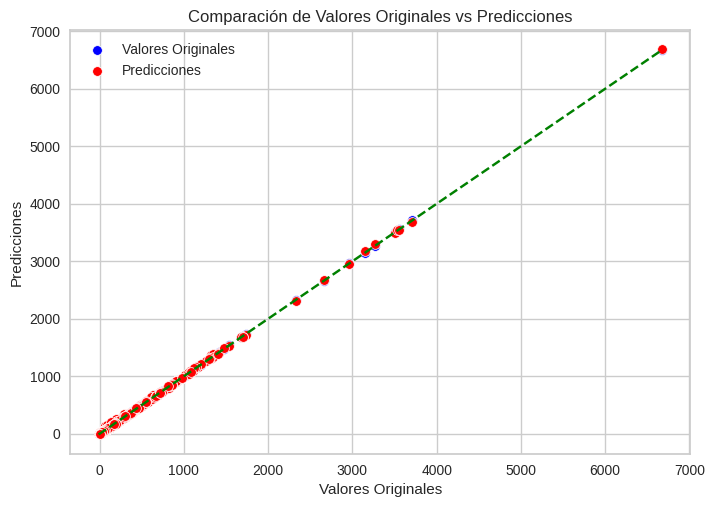

In [54]:
# Graficar valores reales vs predichos

# Scatter plot de los valores originales
sns.scatterplot(x=predictions['tiempo_resolucion'], y=predictions['tiempo_resolucion'], color='blue', label='Valores Originales')

# Scatter plot de las predicciones
sns.scatterplot(x=predictions['tiempo_resolucion'], y=predictions['prediction_label'], color='red', label='Predicciones')

# Línea de identidad
plt.plot([predictions['tiempo_resolucion'].min(), predictions['tiempo_resolucion'].max()],
         [predictions['tiempo_resolucion'].min(), predictions['tiempo_resolucion'].max()],
         color='green', linestyle='--')

plt.xlabel('Valores Originales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Originales vs Predicciones')
plt.legend()
plt.show()

In [55]:
# Para predecir el tiempo de resolución para nuevas solicitudes
nuevas_solicitudes = pd.DataFrame({
    'id_mes': [2,8,11],'año':[2020,2020,2021], 'dia':[15,7,21],
    'id_area_de_servicio':[0,3, 4], 'id_atrasada':[0,0,1], 'id_categoria':[20,13,50],
    'id_departamento':[12,9, 27], 'id_estado':[0,1, 1], 'id_medio':[1, 2, 4],
    'id_naturaleza':[3,0, 1], 'id_prioridad':[1, 4, 4], 'id_reabierta':[0,1, 0],
    'id_servicio':[0,3, 4], 'id_tipo_naturaleza':[5,6, 2], 'avances_orden_de_trabajo' :[0, 100, 80],
    'fecha_radicacion_solicitud': ["2020-02-15 12:27:00","2020-08-07 09:23:42", "2021-11-21 10:13:32"],
    'fecha_cierre_solicitud': ["2020-02-16 17:37:00","2020-08-07 14:33:42", "2021-11-21 16:49:32"],
    'fecha_vencimiento_solicitud': ["2020-02-17 22:00:00","2020-08-09 22:00:00", "2021-11-23 22:00:00"],})

nuevas_solicitudes['fecha_radicacion_solicitud'] = pd.to_datetime(nuevas_solicitudes['fecha_radicacion_solicitud'])
nuevas_solicitudes['fecha_vencimiento_solicitud'] = pd.to_datetime(nuevas_solicitudes['fecha_vencimiento_solicitud'])
nuevas_solicitudes['fecha_cierre_solicitud'] = pd.to_datetime(nuevas_solicitudes['fecha_cierre_solicitud'])


In [56]:
nuevas_solicitudes

,id_mes,año,dia,id_area_de_servicio,id_atrasada,id_categoria,id_departamento,id_estado,id_medio,id_naturaleza,id_prioridad,id_reabierta,id_servicio,id_tipo_naturaleza,avances_orden_de_trabajo,fecha_radicacion_solicitud,fecha_cierre_solicitud,fecha_vencimiento_solicitud
0,2,2020,15,0,0,20,12,0,1,3,1,0,0,5,0,2020-02-15 12:27:00,2020-02-16 17:37:00,2020-02-17 22:00:00
1,8,2020,7,3,0,13,9,1,2,0,4,1,3,6,100,2020-08-07 09:23:42,2020-08-07 14:33:42,2020-08-09 22:00:00
2,11,2021,21,4,1,50,27,1,4,1,4,0,4,2,80,2021-11-21 10:13:32,2021-11-21 16:49:32,2021-11-23 22:00:00


In [57]:
predictions_train = predict_model(tuned_model, data=nuevas_solicitudes)
predictions_train['tiempo_resolucion'] = (predictions_train['fecha_cierre_solicitud'] - predictions_train['fecha_radicacion_solicitud']).dt.total_seconds() / 3600
predictions_train

,id_mes,año,dia,id_area_de_servicio,id_atrasada,id_categoria,id_departamento,id_estado,id_medio,id_naturaleza,id_prioridad,id_reabierta,id_servicio,id_tipo_naturaleza,avances_orden_de_trabajo,fecha_radicacion_solicitud,fecha_cierre_solicitud,fecha_vencimiento_solicitud,prediction_label,tiempo_resolucion
0,2,2020,15,0,0,20,12,0,1,3,1,0,0,5,0,2020-02-15 12:27:00,2020-02-16 17:37:00,2020-02-17 22:00:00,22.174212,29.166667
1,8,2020,7,3,0,13,9,1,2,0,4,1,3,6,100,2020-08-07 09:23:42,2020-08-07 14:33:42,2020-08-09 22:00:00,6.611020,5.166667
2,11,2021,21,4,1,50,27,1,4,1,4,0,4,2,80,2021-11-21 10:13:32,2021-11-21 16:49:32,2021-11-23 22:00:00,0.182313,6.600000


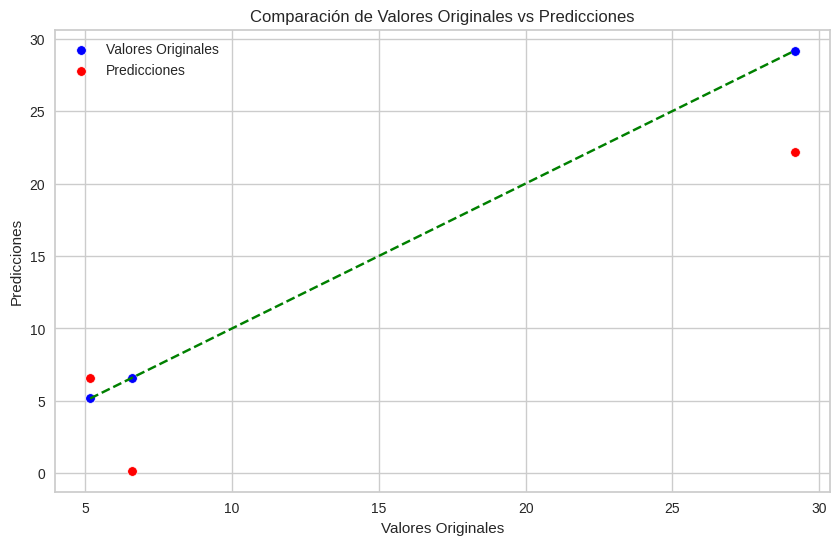

In [58]:
# Graficar las predicciones vs los valores originales
plt.figure(figsize=(10, 6))

# Scatter plot de los valores originales
sns.scatterplot(x=predictions_train['tiempo_resolucion'], y=predictions_train['tiempo_resolucion'], color='blue', label='Valores Originales')

# Scatter plot de las predicciones
sns.scatterplot(x=predictions_train['tiempo_resolucion'], y=predictions_train['prediction_label'], color='red', label='Predicciones')

# Línea de identidad
plt.plot([predictions_train['tiempo_resolucion'].min(), predictions_train['tiempo_resolucion'].max()],
         [predictions_train['tiempo_resolucion'].min(), predictions_train['tiempo_resolucion'].max()],
         color='green', linestyle='--')

plt.xlabel('Valores Originales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Originales vs Predicciones')
plt.legend()
plt.show()